In [104]:
import numpy as np
from numpy import sqrt, mean, absolute
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Dataset



##training

In [105]:
df = pd.read_excel('Train_Termos.xlsx', engine='openpyxl')
df

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,target
0,112,78,73,83,91,83,91,102,101,89,89,87,86
1,78,73,83,91,83,91,102,101,89,89,87,86,93
2,73,83,91,83,91,102,101,89,89,87,86,93,91
3,83,91,83,91,102,101,89,89,87,86,93,91,95
4,91,83,91,102,101,89,89,87,86,93,91,95,86
5,83,91,102,101,89,89,87,86,93,91,95,86,105
6,91,102,101,89,89,87,86,93,91,95,86,105,100
7,102,101,89,89,87,86,93,91,95,86,105,100,100
8,101,89,89,87,86,93,91,95,86,105,100,100,74
9,89,89,87,86,93,91,95,86,105,100,100,74,92


##testing

In [106]:
dft = pd.read_excel('Test_Termos.xlsx', engine='openpyxl')
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12
0,93,91,95,86,105,100,100,74,92,88,85,117
1,91,95,86,105,100,100,74,92,88,85,117,107
2,95,86,105,100,100,74,92,88,85,117,107,108
3,86,105,100,100,74,92,88,85,117,107,108,108
4,105,100,100,74,92,88,85,117,107,108,108,95
5,100,100,74,92,88,85,117,107,108,108,95,103
6,100,74,92,88,85,117,107,108,108,95,103,85
7,74,92,88,85,117,107,108,108,95,103,85,83
8,92,88,85,117,107,108,108,95,103,85,83,104
9,88,85,117,107,108,108,95,103,85,83,104,91


# Normalisasi


##Training

In [107]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_norm = mmscaler.fit_transform(df)
pd.DataFrame(dataset_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.113636,0.000000,0.209302,0.395349,0.209302,0.395349,0.651163,0.627907,0.348837,0.348837,0.302326,0.279070
1,0.128205,0.000000,0.227273,0.395349,0.209302,0.395349,0.651163,0.627907,0.348837,0.348837,0.302326,0.279070,0.441860
2,0.000000,0.227273,0.409091,0.209302,0.395349,0.651163,0.627907,0.348837,0.348837,0.302326,0.279070,0.441860,0.395349
3,0.256410,0.409091,0.227273,0.395349,0.651163,0.627907,0.348837,0.348837,0.302326,0.279070,0.441860,0.395349,0.488372
4,0.461538,0.227273,0.409091,0.651163,0.627907,0.348837,0.348837,0.302326,0.279070,0.441860,0.395349,0.488372,0.279070
5,0.256410,0.409091,0.659091,0.627907,0.348837,0.348837,0.302326,0.279070,0.441860,0.395349,0.488372,0.279070,0.720930
6,0.461538,0.659091,0.636364,0.348837,0.348837,0.302326,0.279070,0.441860,0.395349,0.488372,0.279070,0.720930,0.604651
7,0.743590,0.636364,0.363636,0.348837,0.302326,0.279070,0.441860,0.395349,0.488372,0.279070,0.720930,0.604651,0.604651
8,0.717949,0.363636,0.363636,0.302326,0.279070,0.441860,0.395349,0.488372,0.279070,0.720930,0.604651,0.604651,0.000000
9,0.410256,0.363636,0.318182,0.279070,0.441860,0.395349,0.488372,0.279070,0.720930,0.604651,0.604651,0.000000,0.418605


##Testing

In [108]:
from sklearn.preprocessing import MinMaxScaler
# default range 0-1
mmscaler = MinMaxScaler()
dataset_tes_norm = mmscaler.fit_transform(dft)
pd.DataFrame(dataset_tes_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.441860,0.395349,0.488372,0.279070,0.720930,0.604651,0.604651,0.000000,0.264706,0.147059,0.058824,1.000000
1,0.395349,0.488372,0.279070,0.720930,0.604651,0.604651,0.000000,0.418605,0.147059,0.058824,1.000000,0.705882
2,0.488372,0.279070,0.720930,0.604651,0.604651,0.000000,0.418605,0.325581,0.058824,1.000000,0.705882,0.735294
3,0.279070,0.720930,0.604651,0.604651,0.000000,0.418605,0.325581,0.255814,1.000000,0.705882,0.735294,0.735294
4,0.720930,0.604651,0.604651,0.000000,0.418605,0.325581,0.255814,1.000000,0.705882,0.735294,0.735294,0.352941
5,0.604651,0.604651,0.000000,0.418605,0.325581,0.255814,1.000000,0.767442,0.735294,0.735294,0.352941,0.588235
6,0.604651,0.000000,0.418605,0.325581,0.255814,1.000000,0.767442,0.790698,0.735294,0.352941,0.588235,0.058824
7,0.000000,0.418605,0.325581,0.255814,1.000000,0.767442,0.790698,0.790698,0.352941,0.588235,0.058824,0.000000
8,0.418605,0.325581,0.255814,1.000000,0.767442,0.790698,0.790698,0.488372,0.588235,0.058824,0.000000,0.617647
9,0.325581,0.255814,1.000000,0.767442,0.790698,0.790698,0.488372,0.674419,0.058824,0.000000,0.617647,0.235294


# Pembagian data input dan target


##training

In [109]:
X = dataset_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y_norm = dataset_norm[:, [-1]]
y = y_norm.reshape(24)

##testing

In [110]:
x_tes = dataset_tes_norm[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

# K-Fold Cross validation

In [111]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X,y):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] TEST: [ 3 13 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19 21 22 23] TEST: [14 17 20]
TRAIN: [ 0  1  3  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 2  4 10]
TRAIN: [ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23] TEST: [ 6  7 19]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23] TEST: [ 1 21]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23] TEST: [ 0 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22] TEST: [15 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23] TEST: [ 9 22]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 8 12]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [ 5 11]


##Menampilkan hasil split data

In [112]:
for train_index, test_index in cv.split(X,y):
   print("------------------------------------------------------------------------")
   print("Index TRAIN:", train_index, "Index TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print("X_TRAIN: \n",X_train,"\n X_Test: \n",X_test,"\n Y_Train: \n", y_train,"\nY_Test: ", y_test)
   print("------------------------------------------------------------------------\n\n")

------------------------------------------------------------------------
Index TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 19 20 21 22 23] Index TEST: [ 3 13 18]
X_TRAIN: 
 [[1.         0.11363636 0.         0.20930233 0.39534884 0.20930233
  0.39534884 0.65116279 0.62790698 0.34883721 0.34883721 0.30232558]
 [0.12820513 0.         0.22727273 0.39534884 0.20930233 0.39534884
  0.65116279 0.62790698 0.34883721 0.34883721 0.30232558 0.27906977]
 [0.         0.22727273 0.40909091 0.20930233 0.39534884 0.65116279
  0.62790698 0.34883721 0.34883721 0.30232558 0.27906977 0.44186047]
 [0.46153846 0.22727273 0.40909091 0.65116279 0.62790698 0.34883721
  0.34883721 0.30232558 0.27906977 0.44186047 0.39534884 0.48837209]
 [0.25641026 0.40909091 0.65909091 0.62790698 0.34883721 0.34883721
  0.30232558 0.27906977 0.44186047 0.39534884 0.48837209 0.27906977]
 [0.46153846 0.65909091 0.63636364 0.34883721 0.34883721 0.30232558
  0.27906977 0.44186047 0.39534884 0.48837209 0.27906977 0.720

## Pembangunan Model Regresi

In [113]:
## membangun model
model = KNeighborsRegressor(metric='euclidean')
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

# Evaluasi

RMSE value for k=  1 is: 0.5786913866044945
RMSE value for k=  2 is: 0.4963041703001944
RMSE value for k=  3 is: 0.46727535054823316
RMSE value for k=  4 is: 0.45664771080445127
RMSE value for k=  5 is: 0.46572440864335374
RMSE value for k=  6 is: 0.4490155755428795
RMSE value for k=  7 is: 0.4446681791968644
RMSE value for k=  8 is: 0.4575486588263575
RMSE value for k=  9 is: 0.4547102512318873
RMSE value for k=  10 is: 0.4480361973195103
RMSE value for k=  11 is: 0.4418233729470539
RMSE value for k=  12 is: 0.4360602926332201
RMSE value for k=  13 is: 0.43405288637371137
RMSE value for k=  14 is: 0.43697464898300525


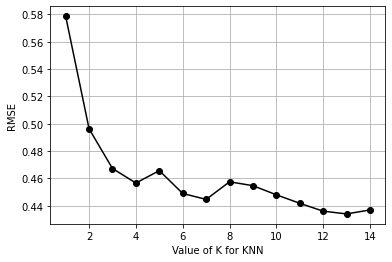

In [114]:
k_range = range(1, 15)
rmse_err = []
for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k, metric='euclidean')    
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
    RMSE = sqrt(mean(absolute(scores)))
    rmse_err.append(RMSE) 
    print('RMSE value for k= ' , k , 'is:', RMSE)
plt.plot(k_range, rmse_err, '-ok')
plt.xlabel('Value of K for KNN')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#Performance Measure

In [116]:
#akurasi RMSE
model = KNeighborsRegressor(n_neighbors=13, metric='euclidean')
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)    
sqrt(mean(absolute(scores)))

0.43405288637371137

# Model terbaik

In [117]:
model = KNeighborsRegressor(n_neighbors=13, metric='euclidean')
model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

# Prediksi Penjualan

In [118]:
y_pred = model.predict(x_tes)
y_pred
dft['prediksi'] = y_pred
dft

,bln-1,bln-2,bln-3,bln-4,bln-5,bln-6,bln-7,bln-8,bln-9,bln-10,bln-11,bln-12,prediksi
0,93,91,95,86,105,100,100,74,92,88,85,117,0.475850
1,91,95,86,105,100,100,74,92,88,85,117,107,0.515206
2,95,86,105,100,100,74,92,88,85,117,107,108,0.554562
3,86,105,100,100,74,92,88,85,117,107,108,108,0.495528
4,105,100,100,74,92,88,85,117,107,108,108,95,0.432916
5,100,100,74,92,88,85,117,107,108,108,95,103,0.425760
6,100,74,92,88,85,117,107,108,108,95,103,85,0.432916
7,74,92,88,85,117,107,108,108,95,103,85,83,0.474061
8,92,88,85,117,107,108,108,95,103,85,83,104,0.520572
9,88,85,117,107,108,108,95,103,85,83,104,91,0.524150


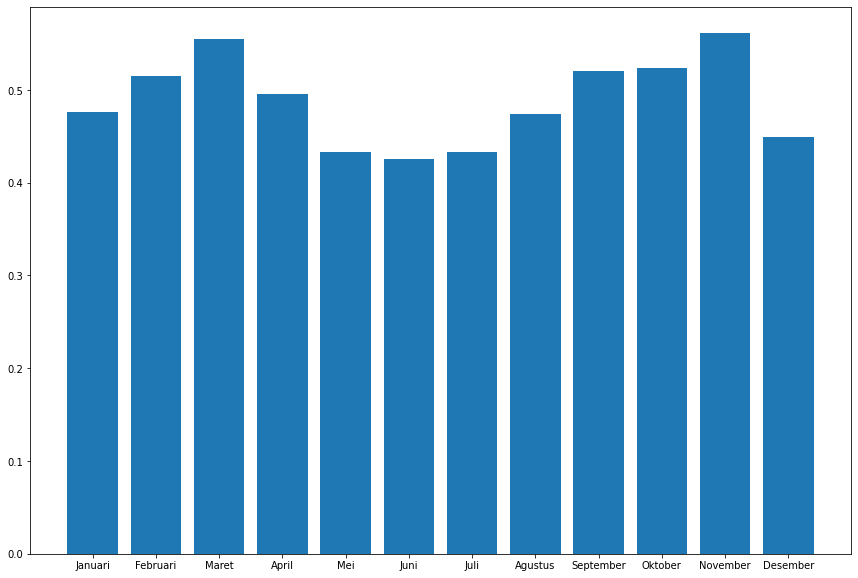

In [119]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.9,1.9])
Prediksi = np.array(dft['prediksi'])
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

ax.bar(Bulan,Prediksi)
plt.show()